In [1]:
import pandas as pd
import numpy as np
import retrieval
import visual
import plotly.express as px

## Single stock

In [2]:
TICKER = "PLTR"
start_date='2020-01-01'
end_date='2024-01-01'

In [3]:
pltr_df = retrieval.single_stock(TICKER, start_date, end_date)
pltr_df.head()

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume,Daily Return,Trend
0,2020-09-30,10.00,11.41,9.11,9.50,9.50,338584400,0.000000,Insignificant Change
1,2020-10-01,9.69,10.10,9.23,9.46,9.46,124297600,-0.421052,Negative Change
2,2020-10-02,9.06,9.28,8.94,9.20,9.20,55018300,-2.748417,Negative Change
3,2020-10-05,9.43,9.49,8.92,9.03,9.03,36316900,-1.847827,Negative Change
4,2020-10-06,9.04,10.18,8.90,9.90,9.90,90864000,9.634551,Bull Run


In [4]:
count_df = pltr_df.groupby(['Trend'])['Date'].count().reset_index().rename(columns={'Date':'Counts'})

In [5]:
fig = px.pie(count_df, values='Counts', names='Trend', title=f'{TICKER}: Trend Breakdown')
fig.show()

In [6]:
# Plot High, Low, Open, Close and Adj Close
visual.plot_financial_data(pltr_df.drop(['Volume', 'Daily Return', 'Trend'], axis = 1), f'{TICKER}: Stock Price [$]')

## Multiple stocks

In [7]:
TICKER_LIST = ['AMZN', 'AAPL', 'META', 'MSFT', 'NVDA', 'TSLA', 'GOOGL']
start_date='2020-01-01'
end_date='2024-01-01'

In [8]:
mag7_df, mag7_return_df = retrieval.multiple_stock(TICKER_LIST, start_date, end_date)
mag7_df.head()

[*********************100%***********************]  7 of 7 completed


Ticker,Date,AAPL,AMZN,GOOGL,META,MSFT,NVDA,TSLA
0,2020-01-02,72.876099,94.900497,68.264961,209.150269,153.938202,5.973121,28.684000
1,2020-01-03,72.167603,93.748497,67.907852,208.043610,152.021439,5.877517,29.534000
2,2020-01-06,72.742661,95.143997,69.717865,211.961807,152.414368,5.902163,30.102667
3,2020-01-07,72.400543,95.343002,69.583206,212.420410,151.024673,5.973620,31.270666
4,2020-01-08,73.565178,94.598503,70.078476,214.573944,153.430237,5.984824,32.809334


In [9]:
mag7_return_df.head()

Ticker,Date,AAPL,AMZN,GOOGL,META,MSFT,NVDA,TSLA
0,2020-01-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2020-01-03,-0.972193,-1.213903,-0.523122,-0.529121,-1.245151,-1.600569,2.963326
2,2020-01-06,0.796837,1.488557,2.665395,1.883354,0.258470,0.419323,1.925464
3,2020-01-07,-0.470312,0.209162,-0.193148,0.216361,-0.911787,1.210690,3.880052
4,2020-01-08,1.608599,-0.780864,0.711766,1.013807,1.592828,0.187562,4.920483


In [10]:
visual.plot_financial_data(mag7_df, 'Adjusted Closing Prices [$]')

In [11]:
visual.plot_histogram_data(mag7_return_df)

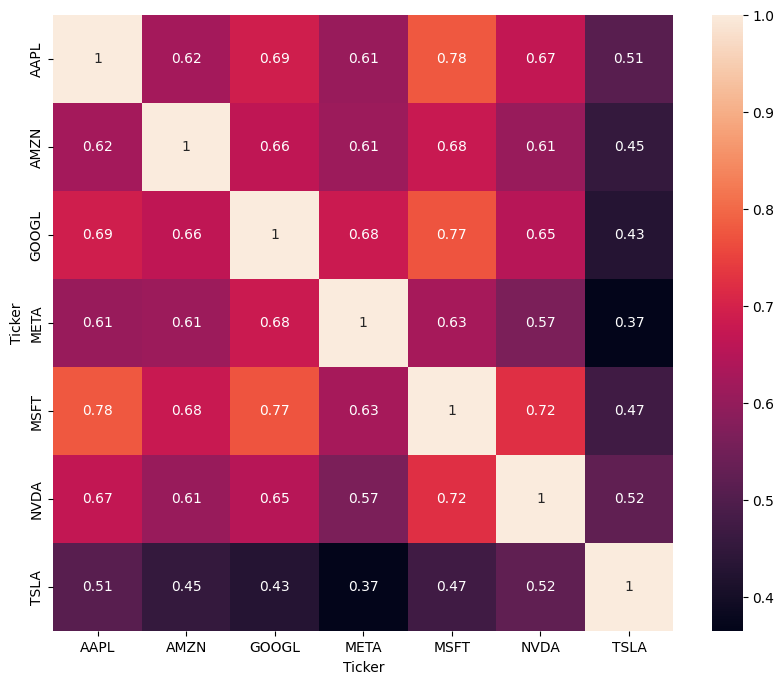

In [12]:
visual.plot_heatmap_data(mag7_return_df)